In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

# T_dataset = pd.read_csv("~/data/glac/T.csv")
# TT_dataset = pd.read_csv("~/data/glac/TT.csv")
# TTT_dataset = pd.read_csv("~/data/glac/TTT.csv")


T_dataset = pd.read_csv("~/stuff/coding/glacier/data/T.csv")
TT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TT.csv")
TTT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TTT.csv")


T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)
T_dataset = T_dataset.dropna()

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)
TT_dataset = TT_dataset.dropna()


TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)
TTT_dataset = TTT_dataset.dropna()

T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT","LON":"LON_CENT"}, inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND","UPPER_BOUND":"TT_UPPER_BOUND","AREA":"TT_AREA","MEAN_SLOPE":"TT_MEAN_SLOPE","MEAN_THICKNESS":"TT_MEAN_THICKNESS"}, inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION","THICKNESS":"POINT_THICKNESS"}, inplace = True)

TTT_plu = pd.merge(TTT, T, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])

TTT_plus

/home/simon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT","LON":"LON_CENT"}, inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND","UPPER_BOUND":"TT_UPPER_BOUND","AREA":"TT_AREA","MEAN_SLOPE":"TT_MEAN_SLOPE","MEAN_THICKNESS":"TT_MEAN_THICKNESS"}, inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION","THICKNESS":"POINT_THICKNESS"}, inplace = True)

TTT_plu = pd.merge(TTT, T, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])

TTT_plus

,GlaThiDa_ID,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,TT_MEAN_THICKNESS,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_THICKNESS,LAT_CENT,LON_CENT
0,362,2600,2650,0.01985,24.0,14,46.960842,9.390134,2624.0,15,46.9595,9.3891
1,362,2600,2650,0.01985,24.0,14,46.960844,9.390126,2625.0,15,46.9595,9.3891
2,362,2600,2650,0.01985,24.0,14,46.960847,9.390118,2625.0,15,46.9595,9.3891
3,362,2600,2650,0.01985,24.0,14,46.960849,9.390111,2625.0,14,46.9595,9.3891
4,362,2600,2650,0.01985,24.0,14,46.960851,9.390103,2624.0,14,46.9595,9.3891
...,...,...,...,...,...,...,...,...,...,...,...,...
166422,2100,5100,5200,0.01600,32.0,0,39.235309,97.762576,4780.0,90,39.2370,97.7550
166423,2100,5100,5200,0.01600,32.0,0,39.235217,97.762203,4780.0,101,39.2370,97.7550
166424,2100,5100,5200,0.01600,32.0,0,39.235171,97.761845,4780.0,106,39.2370,97.7550
166425,2100,5100,5200,0.01600,32.0,0,39.235114,97.761459,4782.0,112,39.2370,97.7550


In [16]:
# TTT_plus.dropna()
TTT_plus.isna().sum()
TTT_plus.dropna()
TTT_plus.isna().sum()

GlaThiDa_ID          0
TT_LOWER_BOUND       0
TT_UPPER_BOUND       0
TT_AREA              0
TT_MEAN_SLOPE        0
TT_MEAN_THICKNESS    0
POINT_LAT            0
POINT_LON            0
POINT_ELEVATION      0
POINT_THICKNESS      0
LAT_CENT             0
LON_CENT             0
dtype: int64

In [17]:
#split the dataset and reserve some to test what was trained.
train_dataset = TTT_plus.sample(frac=0.8, random_state=0)
test_dataset = TTT_plus.drop(train_dataset.index)

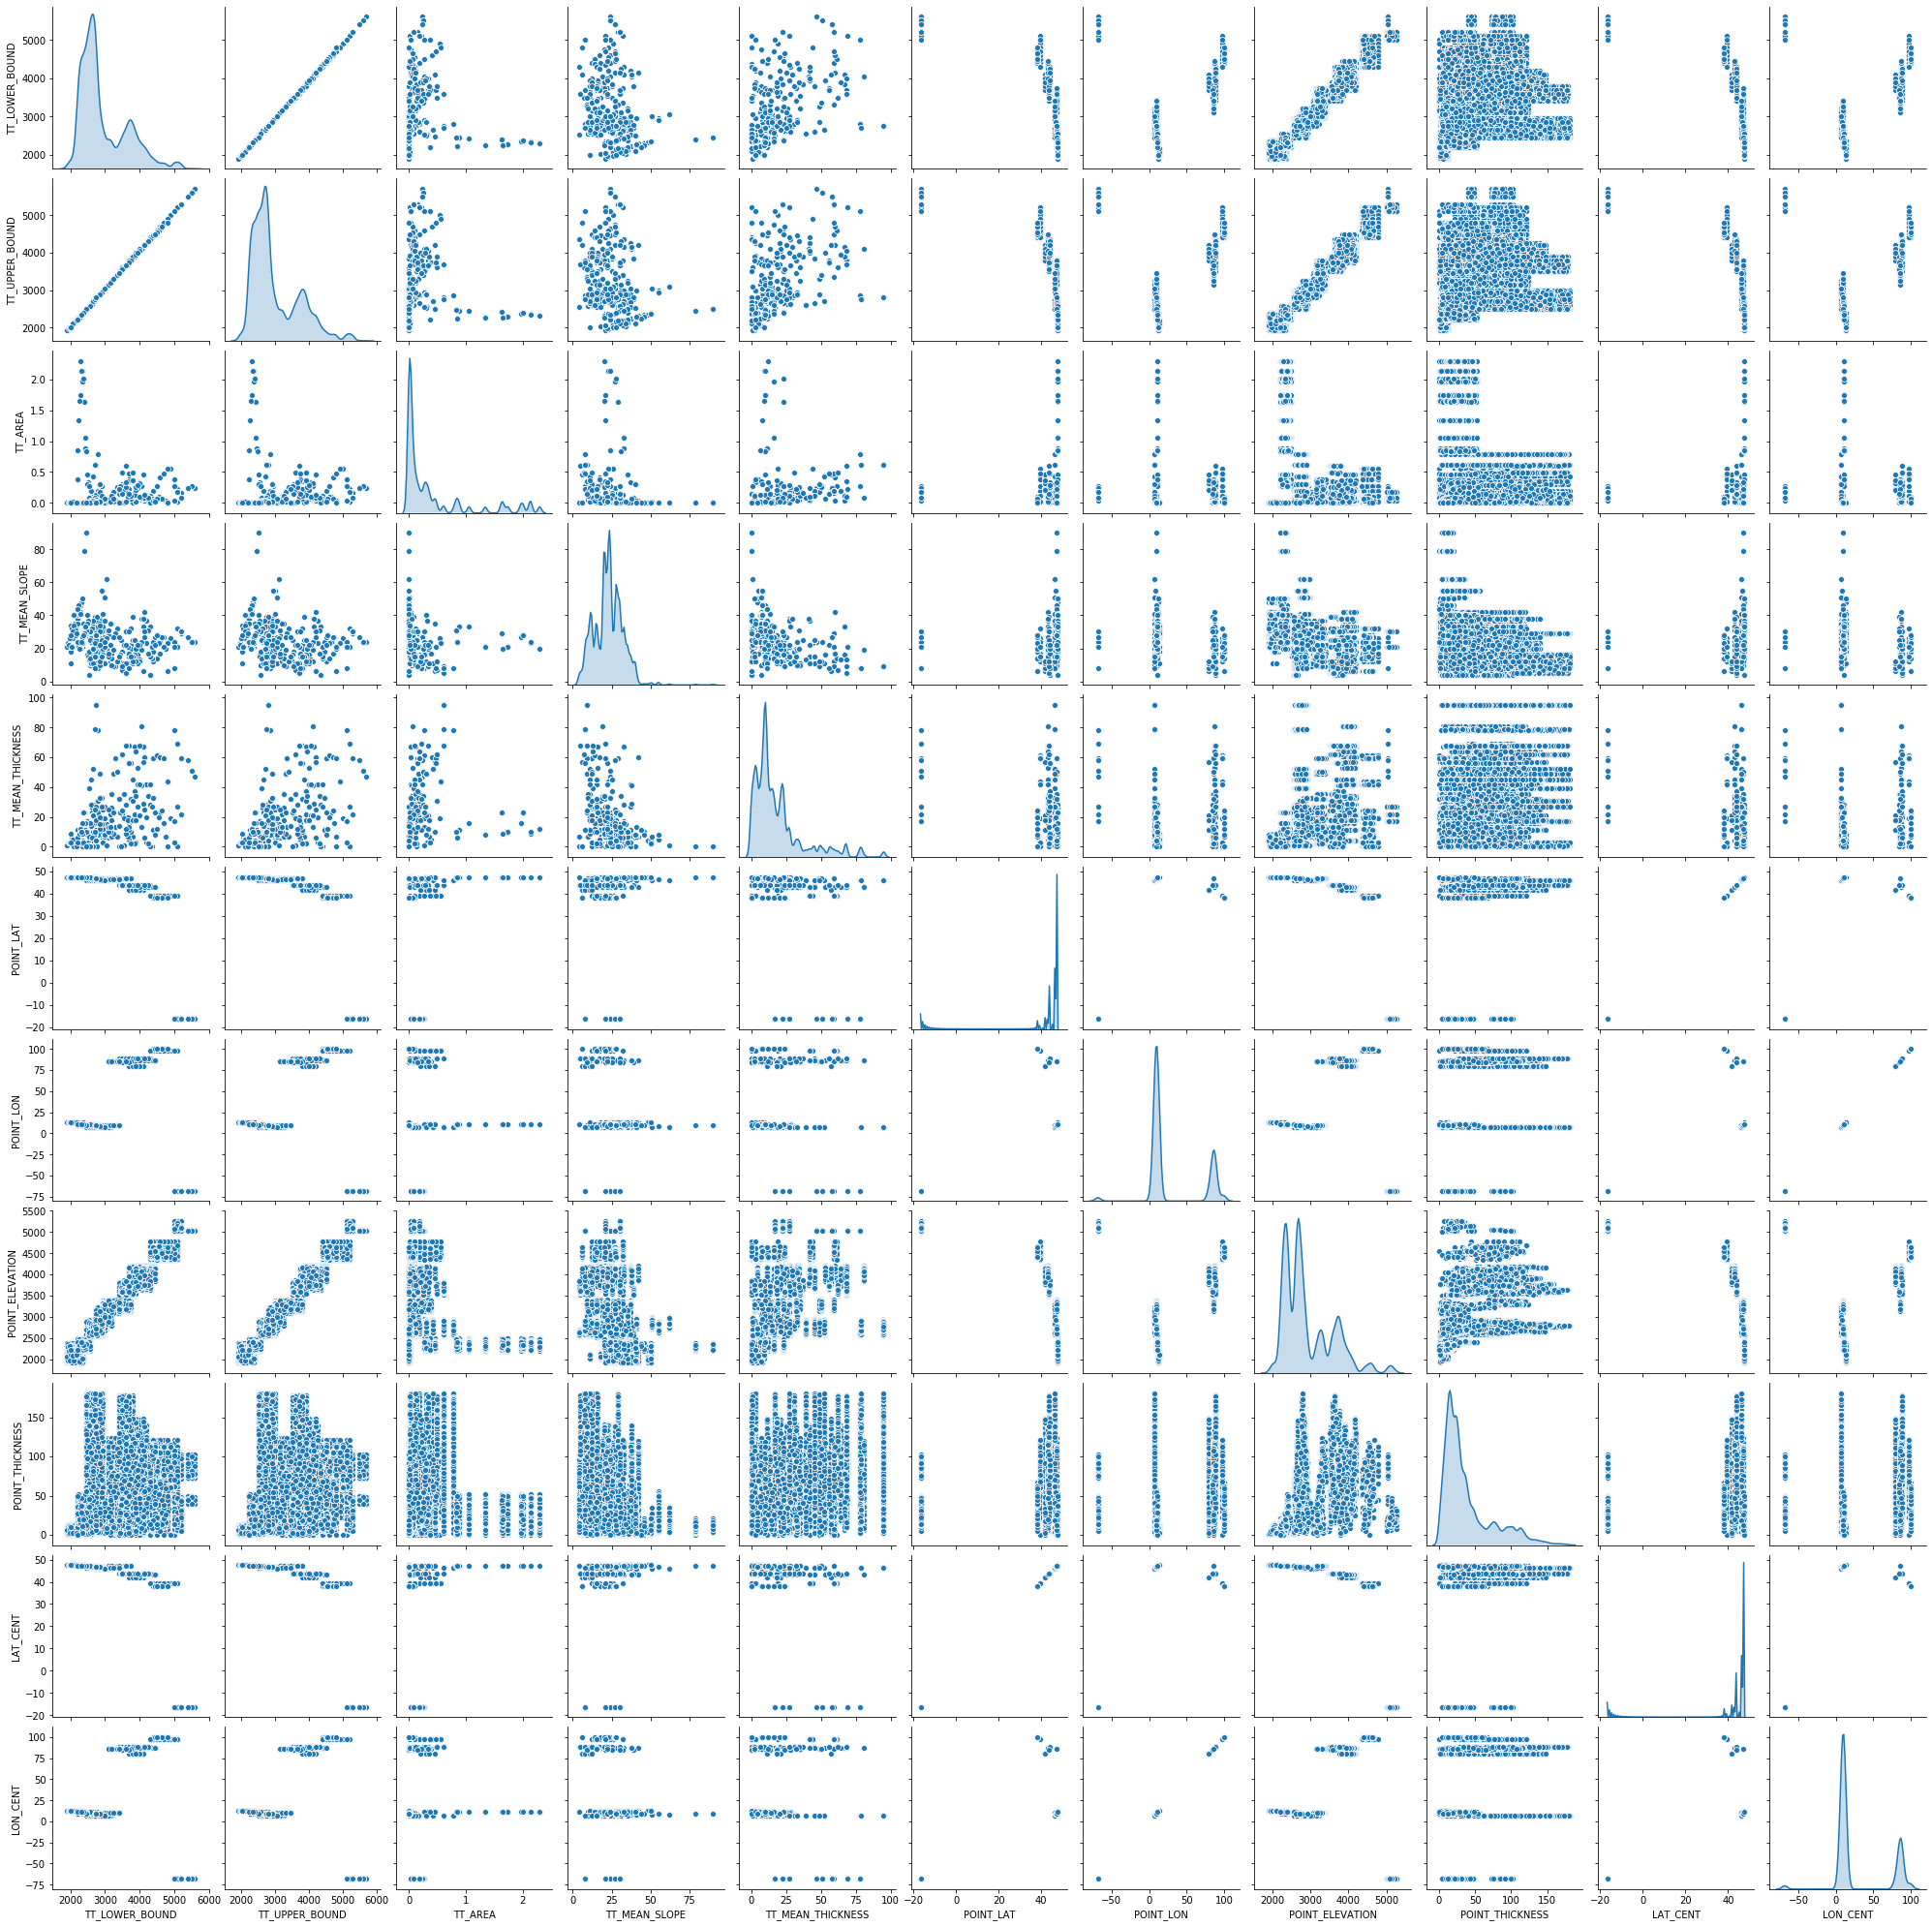

In [19]:
sns.pairplot(train_dataset[["TT_LOWER_BOUND", "TT_UPPER_BOUND", "TT_AREA", "TT_MEAN_SLOPE","TT_MEAN_THICKNESS","POINT_LAT","POINT_LON","POINT_ELEVATION","POINT_THICKNESS", "LAT_CENT","LON_CENT"]], diag_kind='kde')

In [27]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("TT_MEAN_THICKNESS")
test_labels = test_features.pop("TT_MEAN_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
GlaThiDa_ID,1246.065126,805.955247
TT_LOWER_BOUND,2956.907234,678.711591
TT_UPPER_BOUND,2999.129260,693.300833
TT_AREA,0.423253,0.636670
TT_MEAN_SLOPE,23.084023,9.011630
POINT_LAT,45.248961,7.556599
POINT_LON,29.966949,36.369489
POINT_ELEVATION,2930.546484,649.182383
POINT_THICKNESS,38.769164,33.889366
LAT_CENT,45.248784,7.555996


In [28]:
#establish normalization layers
normalizer = {}
variable_list = ("TT_LOWER_BOUND", "TT_UPPER_BOUND", "TT_AREA", "TT_MEAN_SLOPE","POINT_LAT","POINT_LON","POINT_ELEVATION","POINT_THICKNESS", "LAT_CENT","LON_CENT")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

In [29]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.1),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [30]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [ ]:
%%time
variable_list = ("TT_LOWER_BOUND", "TT_UPPER_BOUND", "TT_AREA", "TT_MEAN_SLOPE","POINT_LAT","POINT_LON","POINT_ELEVATION","POINT_THICKNESS", "LAT_CENT","LON_CENT")
for variable_name in variable_list:

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=10,
#                                         verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

Epoch 1/10
3329/3329 [==============================] - 3s 805us/step - loss: 11.0106 - val_loss: 10.9469
Epoch 2/10
3329/3329 [==============================] - 3s 756us/step - loss: 10.8886 - val_loss: 10.9379
Epoch 3/10
3329/3329 [==============================] - 3s 783us/step - loss: 10.8856 - val_loss: 10.9711
Epoch 4/10
3329/3329 [==============================] - 3s 906us/step - loss: 10.8875 - val_loss: 10.9383
Epoch 5/10
3329/3329 [==============================] - 4s 1ms/step - loss: 10.8876 - val_loss: 10.9399
Epoch 6/10
3329/3329 [==============================] - 3s 848us/step - loss: 10.8886 - val_loss: 10.9505
Epoch 7/10
3329/3329 [==============================] - 3s 834us/step - loss: 10.8881 - val_loss: 10.9392
Epoch 8/10
3329/3329 [==============================] - 3s 792us/step - loss: 10.8888 - val_loss: 10.9464
Epoch 9/10
3329/3329 [==============================] - 3s 804us/step - loss: 10.8895 - val_loss: 10.9592
Epoch 10/10
3329/3329 [=========================

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])

In [ ]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

history = linear_model.fit(
train_features, train_labels,        
   epochs=10,
#    verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

In [ ]:
plot_loss(history)

In [ ]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [ ]:
test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}

In [ ]:
%%time
variable_list = ("TT_LOWER_BOUND", "TT_UPPER_BOUND", "TT_AREA", "TT_MEAN_SLOPE","POINT_LAT","POINT_LON","POINT_ELEVATION","POINT_THICKNESS", "LAT_CENT","LON_CENT")
for variable_name in variable_list:

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
#                                         verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

In [ ]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    plot_loss(dnn_history[variable_name])

In [ ]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [ ]:
%%time
history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

In [ ]:
plot_loss(history_full)

In [ ]:
test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

In [ ]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'o')
plt.plot((0,200),(0,150),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')

In [ ]:
plt.subplots()
x = np.reshape(test_labels.values, (-1, 1)) # Training values in a n-by-1 array
pct_error = (x-y)/x
plt.hist(pct_error.flatten())
plt.xlabel('Percent Error')
plt.ylabel('Count')